# TME 2 : Prédiction de gènes - Détection de gènes candidats

Le but de ce TME est d’annoter les régions dans le génome qui correspondent à des gènes. Nous allons prendre en compte les différents éléments qui définissent un gène pour pouvoir déterminer les candidats à des régions codantes : phases ouvertes de lecture, propriétés statistiques du code génétique, et comparer les résultats avec l’annotation qui est disponible. 
Nous nous baserons sur le génome de _Bifidobacterium actinocoloniiforme_ que nous avons commencé à analyser au TME précédent, avec ses annotations et au génome de _Escherichia coli_


### A) Mise en route,  télécharger et preparer les données

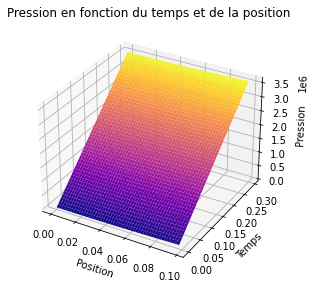

In [47]:
from math import pi
from math import cos
from math import exp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def Mathspec():

    #Constantes 
    rho = 1000 #Masse volumique du liquide
    g = 9.81 #Accélération de la pesanteur 
    L = 30*10**-2 #Longueur de l'os (30cm)
    alpha = 0.78 #Coefficient de Biot
    E = 15*10**9 #Module élasticité
    M = 15*10**9 #Module de Biot 
    A = 1.1*10**-13 #Perméabilité hydraulique 
    B = ((1/M)+(alpha**2))/E
    D = A/B 
    delta = 1

    #définition des bornes
    infini= 1000
    n=50
    pasz= L/n
    Tmin=0
    Tmax=0.1
    pasT=Tmax/n
    t=0
    z=0
    
    #Calcul
    P=np.zeros((50,50))      
    for j in range(n):    #t=colonne
        t=t+pasT*j
        for i in range(n):    #z=ligne
            z=z+pasz*i
            q=0
            for k in range(1,infini+1):    #calcul de la somme dans Q(z,t)
                q = q+(8*rho*g*L)/(alpha*(pi*(2*k+1)**2))*exp(-D*(pi*(2*k+1)/(2*L))**2*t)*delta*cos(pi*(2*k+1)*z/(2*L))

            P[i,j]=4*rho*g*L*delta/(alpha*pi**2) + q + rho*g*(z-L)
    return P

#constantes globales
n = 50

#constantes position
L = 30*10**-2 #Longueur de l'os (30cm)
pasZ= L/n
#position
def valeurs_axe_X():
    X = []
    i = 0
    case = 0
    positions = []
    while i <= L:
        positions.append(i)
        i += pasZ

    j = 0
    while j < n:
        X.append(positions)
        j += 1 

    return X


#constantes temps
Tmax=0.1
pasT=Tmax/n
#temps
def valeurs_axe_Y():
    Y = []
    i = 0
    case = 0
    while i <= Tmax:
        j = 0
        ligne = []
        while j < n:
            ligne.append(i)
            j += 1
        Y.append(ligne)
        case += 1
        i += pasT
    return Y

# Tableau pour les 3 axes
X = valeurs_axe_X()
Y = valeurs_axe_Y()
P = Mathspec()

# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot_surface(Y, X, P, cmap=cm.plasma, linewidth=0)  # Tracé d'une surface
plt.title("Pression en fonction du temps et de la position")
ax.set_xlabel('Position')
ax.set_ylabel('Temps')
ax.set_zlabel('Pression')
plt.tight_layout()
plt.show()

<b>Question 1)</b> Adapter les commandes du TME précédent pour télécharger le génome de _E. coli_ ainsi que ses annotations


ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/026/345/GCF_000026345.1_ASM2634v1/GCF_000026345.1_ASM2634v1_genomic.fna.gz

ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/026/345/GCF_000026345.1_ASM2634v1/GCF_000026345.1_ASM2634v1_feature_table.txt.gz


In [2]:
import urllib.request
#Utliser la fonction urllib.request.urlretrieve(path)

In [3]:
#download _genomic.fna.gz
#wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/026/345/GCF_000026345.1_ASM2634v1/GCF_000026345.1_ASM2634v1_genomic.fna.gz

In [4]:
#download _feature_table.txt.gz
#wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/026/345/GCF_000026345.1_ASM2634v1/GCF_000026345.1_ASM2634v1_feature_table.txt.gz

<b>Question 2)</b> Decompresser les fichiers

In [5]:
import gzip
import shutil

In [6]:
#Decompresser _genomic.fna.gz
#tar xvf _genomic.fna.gz

In [7]:
#Decompresser _feature_table.txt.gz
#tar xvf _genomic.fna.gz

<b>Question 3)</b> Exécuter le code ci-dessous qui va créer un dictionnaire pour représenter le code genetique. Vous avez également deux jeu de séquences pour tester les prochaines fonctions.

In [8]:
# Dictionnaire codons -> acides aminés. Les codons stops sont représentés
# avec le caractère "*"
CODEGENETIQUE = {
    "TTT": "F",
    "TTC": "F",
    "TTA": "L",
    "TTG": "L",
    "TCT": "S",
    "TCC": "S",
    "TCA": "S",
    "TCG": "S",
    "TAT": "Y",
    "TAC": "Y",
    "TAA": "*",
    "TAG": "*",
    "TGT": "C",
    "TGC": "C",
    "TGA": "*",
    "TGG": "W",
    "CTT": "L",
    "CTC": "L",
    "CTA": "L",
    "CTG": "L",
    "CCT": "P",
    "CCC": "P",
    "CCA": "P",
    "CCG": "P",
    "CAT": "H",
    "CAC": "H",
    "CAA": "Q",
    "CAG": "Q",
    "CGT": "R",
    "CGC": "R",
    "CGA": "R",
    "CGG": "R",
    "ATT": "I",
    "ATC": "I",
    "ATA": "I",
    "ATG": "M",
    "ACT": "T",
    "ACC": "T",
    "ACA": "T",
    "ACG": "T",
    "AAT": "N",
    "AAC": "N",
    "AAA": "K",
    "AAG": "K",
    "AGT": "S",
    "AGC": "S",
    "AGA": "R",
    "AGG": "R",
    "GTT": "V",
    "GTC": "V",
    "GTA": "V",
    "GTG": "V",
    "GCT": "A",
    "GCC": "A",
    "GCA": "A",
    "GCG": "A",
    "GAT": "D",
    "GAC": "D",
    "GAA": "E",
    "GAG": "E",
    "GGT": "G",
    "GGC": "G",
    "GGA": "G",
    "GGG": "G"
}

# Utiliser les sequences TESTSEQ et TESTSEQCLEAN pour tester vos fonctions
TESTSEQ = "ATGAAACGCATTAGCMMCACCATTACCACCACCATCACCATTACCACAGKTAACGGTGCGGGCTGA"
TESTSEQCLEAN = "ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA"

### B) Annotation des phases ouvertes de lecture et traduction en séquence protéique

<b>Question 1)</b> Parfois dans les génomes (représentés par des fichiers numériques), nous trouvons des nucléotides qui n'ont pas été correctement identifiés par la machine de séquençage. Certains instruments nous restreignent les possibilités à un sous-ensemble de nucléotides. Ecrire une fonction `remplace_non_identifies` qui remplace les nucléotides non identifiés par une des possibilités listées ci-dessous de façon aléatoire.<br>

R = G,A (purine)<br>
Y = T,C (pyrimidine)<br>
K = G,T (céto)<br>
M = A,C (amino)<br>
S = G,C (obligations solides)<br>
W = A,T (Les liaisons faibles)<br>
B = G,T,C (tous sauf A)<br>
D = G,A,T (tous sauf C)<br>
H = A,C,T (tous sauf G)<br>
V = G,C,A (tous sauf T)<br>
N = A,G,C,T (any)<br>
X = A,G,C,T (any)<br>



In [9]:
import doctest # C’est pour pouvoir utiliser doctest.testmod() et tester les fonctions
import random

In [10]:
random.choice(['A', 'C', 'T', 'G'])

'A'

In [11]:
##### Question 1
def remplace_non_identifies(seq):
    """
    Remplace les nucléotides non identifiés par une des possibilités de façon aléatoire.
    
    """
    new_seq = []
    options = {
        "R": ["G", "A"],
        "Y": ["T", "C"],
        "K": ["G", "T"],
        "M": ["A", "C"],
        "S": ["G", "C"],
        "W": ["A", "T"],
        "B": ["G", "T", "C"],
        "D": ["G", "A", "T"],
        "H": ["A", "C", "T"],
        "V": ["G", "C", "A"],
        "N": ["A", "G", "C", "T"],
        "X": ["A", "G", "C", "T"]
    }
    for a in seq:
        if options.get(a) != None:
            new_seq.append(random.choice(options.get(a)))
        else:
            new_seq.append(a)
    return new_seq

doctest.testmod()

remplace_non_identifies(TESTSEQ)

['A',
 'T',
 'G',
 'A',
 'A',
 'A',
 'C',
 'G',
 'C',
 'A',
 'T',
 'T',
 'A',
 'G',
 'C',
 'A',
 'A',
 'C',
 'A',
 'C',
 'C',
 'A',
 'T',
 'T',
 'A',
 'C',
 'C',
 'A',
 'C',
 'C',
 'A',
 'C',
 'C',
 'A',
 'T',
 'C',
 'A',
 'C',
 'C',
 'A',
 'T',
 'T',
 'A',
 'C',
 'C',
 'A',
 'C',
 'A',
 'G',
 'G',
 'T',
 'A',
 'A',
 'C',
 'G',
 'G',
 'T',
 'G',
 'C',
 'G',
 'G',
 'G',
 'C',
 'T',
 'G',
 'A']

<b>Question 2)</b> Ecrire une fonction `listecodon` qui renvoie une liste de codons pour une séquence passée en paramètre. Par exemple, si on passe la séquence ``AACGTGGCA`` comme paramètre votre fonction doit renvoyer ``[‘AAC’, ‘GTG’, ‘GCA’]``. Si la longueur de la séquence n'est pas un multiple de 3 on ne tiendra pas compte des 1 ou 2 nucléotides restant à la fin.


In [12]:
#Pour avoir une aide sur la documentation de python
?range

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     


In [13]:
# Question 2
def listecodon(seq):
    """
    Renvoie une liste de codons pour une séquence passée en paramètre.
    
    Si la longueur de la séquence n'est pas un multiple de 3 elle ne tiendra pas 
    compte des 1 ou 2 nucléotides restant à la fin.
    
    >>> listecodon('AAACCC')
    ['AAA', 'CCC']
    >>> listecodon('AAACC')
    ['AAA']
    >>> listecodon('AAAC')
    ['AAA']
    """
    res = []
    reste = len(seq) % 3
    for i in range(0, len(seq) - reste, 3):
        codon = seq[i] + seq[(i+1)] + seq[(i+2)]
        res.append(codon)
    return res

doctest.testmod()

assert listecodon(TESTSEQCLEAN) == [
    'ATG', 'AAA', 'CGC', 'ATT', 'AGC', 'ACC', 'ACC', 'ATT', 'ACC', 'ACC',
    'ACC', 'ATC', 'ACC', 'ATT', 'ACC', 'ACA', 'GGT', 'AAC', 'GGT', 'GCG',
    'GGC', 'TGA'
]

<b>Question 3)</b> Ecrire une fonction `reversecompl` qui renvoie le brin complémentaire d’une séquence passée en paramètre. Par exemple, si on passe la séquence ``AACGTGGCA`` comme paramètre votre fonction doit renvoyer ``TGCCACGTT``.


In [14]:
# Question 3
def reversecompl(seq):
    """Renvoie le brin complémentaire d’une séquence."""
    compl = {'A': 'T', 'C': 'G', 'G': 'C', 'T':'A'}
    rev_comp_seq = []
    for a in seq:
        rev_comp_seq += compl.get(a)
    return "".join(reversed(rev_comp_seq))

reversecompl('AACGTGGCA')
assert reversecompl(
    TESTSEQCLEAN
) == "TCAGCCCGCACCGTTACCTGTGGTAATGGTGATGGTGGTGGTAATGGTGGTGCTAATGCGTTTCAT"

<b>Question 4)</b> Ecrire une fonction `liste_orfs` qui retourne la liste de tous les cadres ouverts de lectures, c'est à dire les séquence commençant par un des codons start: ``ATG``, ``GTG``, ``TTG`` (``ATG`` est le plus fréquent) et finissant par un des codons stop : ``TAA``, ``TAG``, ``TGA``. Vous renverrez les séquences pour les 6 phases de lecture (3 pour le brin sens et 3 pour le brin complémentaire). Ces séquences sont nommées séquences CDS (pour _CoDing Sequences_ en anglais) et les phases ouvertes de lecture ORFS (pour _Open Reading Frame_). <br>
Note 1 : si plusieurs start sont trouvés dans la même phase de lecture qu'un stop et en amont de celui ci, le CDS débute par conventions au start le plus en amont. <br>
Note 2 : les CDS peuvent se chevaucher (sur différentes phases et éventuellement sur le brin d'ADN complémentaire).


In [15]:
# Question 4
def __trouver_orfs(codons):
    """Retourne cadres ouverts dans la liste des codons."""
    # starts contient toutes les positions de codons START dans la liste codons
    starts = [
        i for i, codon in enumerate(codons) if codon in {'ATG', 'GTG', 'TTG'}
    ]
    # stops contient toutes les positions de codons STOP dans la liste codons
    stops = [
        i for i, codon in enumerate(codons) if codon in {'TAA', 'TAG', 'TGA'}
    ]
    orfs = []
    for i in starts:
        for j in stops:
            if i < j:
                orfs.append("".join(codons[i:j+1]))
                for k in starts:
                    if k < j:
                        starts.remove(k)
                stops.remove(j)
                break
    return orfs

def liste_orfs(seq):
    """
    Retourne la liste de tous les cadres ouverts de lectures.
        
    >>> sorted(liste_orfs('AAATGATGTAATAGTGTTTTGATTAGGGCAT'))
    ['ATGATGTAA', 'ATGCCCTAA', 'GTGTTTTGA']
    """
    lseq1 = listecodon(seq)
    lseq2 = listecodon(seq[1::])
    lseq3 = listecodon(seq[2::])
    lseq4 = listecodon(reversecompl(seq))
    lseq5 = listecodon(reversecompl(seq)[1::])
    lseq6 = listecodon(reversecompl(seq)[2::])
   
    orfs = __trouver_orfs(lseq1) + __trouver_orfs(lseq2) + __trouver_orfs(lseq3) + __trouver_orfs(lseq4) + __trouver_orfs(lseq5) + __trouver_orfs(lseq6)
    return orfs


doctest.testmod()

TestResults(failed=0, attempted=4)

In [16]:
 liste_orfs(TESTSEQCLEAN)

['ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA']

Voici un code efficaz qui utilise Regular Expression

In [17]:
import re

In [18]:
[
    match.group()
    for match in re.finditer('((ATG|GTG|TTG)((?!TAA|TAG|TGA)([ACTG][ACTG][ACTG]))*(TAA|TAG|TGA))',
                             'AAATGATGTAATAGTGTTTTGATTAGGGCAT')
]

['ATGATGTAA', 'GTGTTTTGA']

In [19]:
def __liste_orfs_sens(seq):
    """Retourne la liste des cadres ouverts de lecture, sens 5' vers 3'."""
    return [
        match.group() for match in re.finditer(
            '((ATG|GTG|TTG)((?!TAA|TAG|TGA)([ACTG][ACTG][ACTG]))*(TAA|TAG|TGA))',
            seq)
    ]


def liste_orfs(seq):
    """
    Retourne la liste de tous les cadres ouverts de lectures.
        
    >>> sorted(liste_orfs('AAATGATGTAATAGTGTTTTGATTAGGGCAT'))
    ['ATGATGTAA', 'ATGCCCTAA', 'GTGTTTTGA']
    """
    liste = __liste_orfs_sens(seq)
    liste.extend(__liste_orfs_sens(reversecompl(seq)))
    return liste


doctest.testmod()

TestResults(failed=0, attempted=4)

In [20]:
liste_orfs(TESTSEQCLEAN)

['ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA']

<b>Question 5)</b> Développez une fonction `traduit_prot` qui étant donné un gène renvoie la protéine traduite. Utilisez le dictionnaire définit ci dessous.

In [21]:
# Question 5
def traduit_prot(seq, codegenetique=CODEGENETIQUE):
    """Renvoie la protéine traduite, par défaut il utilise CODEGENETIQUE."""
    res = ""
    for codon in listecodon(seq):
        res += codegenetique.get(codon)
    return res


assert traduit_prot(TESTSEQCLEAN) == "MKRISTTITTTITITTGNGAG*"

### C) Analyse des phases ouvertes de lecture

<b>Question 1)</b> Utilisez votre fonction `liste_orfs` qui trouve toutes les ORFs pour ne trouver que les ORFs d’un génome sur le brin sens, c'est à dire pour trois premières phases. Sauvegarder l'ensemble des ORFs trouvé dans un fichier de type fasta. Ci-dessous de bout de code pour vous aider.


In [22]:
# charger un fichier fasta 
def read_fasta(filename):
    """Lire un fichier fasta dans un dict à partir des identifiants des séquences."""
    seqs = {}
    with open(filename, 'r') as file:
        seqid = ''
        seq = ''
        for line in file:
            if line.startswith('>'):
                if seqid != '':
                    seqs[seqid] = seq
                else:
                    seq = ''
                seqid = line.replace('>', '').strip()
            else:
                seq = seq + line.strip()
        seqs[seqid] = seq

    return seqs

In [23]:
# sauvegarder un fichier fasta avec les ORFs
def write_fasta(filename, sequences):
    """Ecrivez un fichier fasta à partir d'une liste de séquences."""
    with open(filename, 'w') as file:
        counter = 0
        for seq in sequences:
            file.write('>seq_{}\n{}\n'.format(counter, seq))
            counter += 1

In [24]:
# Montrer les 10 premières lignes d'un fichier
def head(filename):
    """Montrer les 10 premières lignes."""
    with open(filename) as file:
        counter = 0
        for line in file:
            counter += 1
            if counter == 10:
                break

In [25]:
# charger le fichier fasta du génome E. coli
head("GCF_000026345.1_ASM2634v1_genomic.fna")
sequence = read_fasta("GCF_000026345.1_ASM2634v1_genomic.fna")

In [26]:
# extraire les ORFs et les sauvegarder dans fichier fasta
res = []
for i, seq in sequence.items():
    write_fasta("GCF_000026345.1_ASM2634v1_genomic_ORF.fna", liste_orfs(seq))


<b>Question 2)</b> Dessinez un histogramme (avec matplotlib) de la distribution de longueur des ORFs détectés précédemment, que remarquez vous ? 


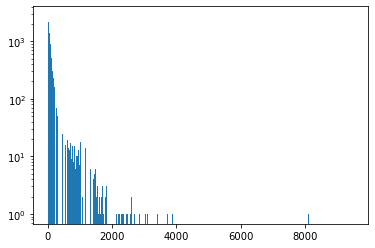

In [27]:
# Question 2
# Plot avec matplotlip
import matplotlib.pyplot as plt
llen = []
for (i,seq) in sequence.items():
    le = liste_orfs(seq)
    for j in le:
        llen.append(len(j))

plt.hist(llen, bins=5000, log=True)
plt.show()


<b>Question 3)</b> Utilisez la question précédente pour fixer un seuil pour dire qu’un ORF est un gène. (par exemple plus que 500 nucléotides). En déduire une première annotation des gènes dans le génome de _Escherichia coli_. Vous produirez un fichier tab avec les positions de tous les ORFs annotés. 

In [28]:
# Question 3
# Fichier d'annotation des ORFs

lorfs = []
for (i,seq) in sequence.items():
    le = __liste_orfs_sens(seq)
    lr = []
    for j in le:
        if len(j)>500:
            lr.append(j)
    write_fasta("GCF_000026345.1_ASM2634v1_genomic_orf_longerthan500.fna", lr)
lstart = []
for i in lr:
    lstart.append(seq.find(i))
res = "#START \t END\n"
i=0
while i<len(lstart):
    res += "{} \t {}\n".format(lstart[i], lstart[i]+len(lr[i]))
    i+=1
fichier = open("tab_genomic_ORF.txt", "w")
fichier.write(res)
#print("l")

31482

62994